In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

/Users/db/Library/Python/3.8/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [146]:
# URL to scrape
URL = 'https://www.amazon.com/s?k=speakers'
#URL = 'https://www.amazon.com/s?k=earphones'
#URL = 'https://www.amazon.com/s?k=charger'

# Header details obtained from the url inspect file
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/78.0.3904.108 Safari/537.36",
    "Accept-Encoding":"gzip, deflate",
    "Accept":"text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8",
    "DNT":"1",
    "Connection":"close",
    "Upgrade-Insecure-Requests":"1"
}
# Send a request to the website
page = requests.get(URL, headers=headers)

In [147]:
# Initiate BeautifulSoup
soup = BeautifulSoup(page.content, 'html.parser')

# Initializing list
data = []

# Using soup object to extract information of each product contained in a div tag
products = soup.find_all('div', class_='s-result-item')
product

<div class="a-section a-spacing-none s-result-item s-flex-full-width s-widget s-widget-spacing-large" data-asin="" data-index="38"><div class="s-widget-container s-spacing-medium s-widget-container-height-medium" data-uuid="1f35e6ac-0f78-49bc-90b3-e1cdccc1c79a"><div cel_widget_id="ape-safeframe-card_loom-desktop-footer-slot_44" class="celwidget pd_rd_w-WkJLB content-id-amzn1.sym.6b628b1d-21dc-4071-b286-102b76c3a29e:amzn1.sym.6b628b1d-21dc-4071-b286-102b76c3a29e pf_rd_p-6b628b1d-21dc-4071-b286-102b76c3a29e pf_rd_r-41X65K79JRDFZRMZABXV pd_rd_wg-gQQZb pd_rd_r-73c9a751-6b4f-436a-a3ef-99b530b7c96b c-f" data-csa-c-content-id="amzn1.sym.6b628b1d-21dc-4071-b286-102b76c3a29e:amzn1.sym.6b628b1d-21dc-4071-b286-102b76c3a29e" data-csa-c-painter="ape-safeframe-card-cards" data-csa-c-slot-id="DsUnknown-45" data-csa-c-type="widget" data-csa-op-log-render=""><script>if(window.mix_csa){window.mix_csa('[cel_widget_id="ape-safeframe-card_loom-desktop-footer-slot_44"]', '#CardInstanceASABJhH6ySvAXgG95-Bv1w

In [148]:
# Parsing through all span values in products

# Extracting text from span tag for relevant information and setting 'N/A' if values not found

for product in products:
    name = product.find('span', class_='a-size-medium a-color-base a-text-normal').get_text(strip=True) if product.find('span', class_='a-size-medium a-color-base a-text-normal') else 'N/A'
    rating = product.find('span', class_='a-icon-alt').get_text(strip=True) if product.find('span', class_='a-icon-alt') else 'N/A'
    customer_count = product.find('span', class_='a-size-base s-underline-text').get_text(strip=True) if product.find('span', class_='a-size-base s-underline-text') else 'N/A'
    price = product.find('span', class_='a-offscreen').get_text(strip=True) if product.find('span', class_='a-offscreen') else 'N/A'
    delivery = product.find('span', class_='a-color-base a-text-bold').get_text(strip=True) if product.find('span', class_='a-color-base a-text-bold') else 'N/A'
    # Only adding rows where product name is available
    if name != 'N/A':  
        data.append({
            'Product': name,
            'Rating': rating,
            'Customer Count': customer_count,
            'Price': price,
            'Delivery': delivery
        })    
#    data.append({
#        'Product': name,
#        'Rating': rating,
#        'Customer Count': customer_count,
#        'Price': price,
#        'Fastest Delivery': fastest_delivery
#    })
#    print(data)

In [157]:
# Convert dictionary into DataFrame for a presentable table
df = pd.DataFrame(data)
df

,Product,Rating,Customer Count,Price,Delivery
0,Amazon Echo Pop | Full sound compact smart spe...,4.7 out of 5 stars,"36,117",$22.99,"Mon, Mar 25"
1,"Echo Dot (5th Gen, 2022 release) | Internation...",4.8 out of 5 stars,419,$49.99,N/A
2,Amazon Basics USB Plug-n-Play Computer 2 Speak...,4.4 out of 5 stars,"63,798",$14.99,"Mon, Mar 25"
3,"Upgraded, Anker Soundcore Bluetooth Speaker wi...",4.6 out of 5 stars,"102,408",$27.99,"Mon, Mar 25"
4,Edifier R1280T Powered Bookshelf Speakers - 2....,4.6 out of 5 stars,"17,540",$99.99,"Mon, Mar 25"
5,"Bluetooth Speakers, Wireless TWS Portable Spea...",4.4 out of 5 stars,"2,896",$79.99,"Mon, Mar 25"
6,JBL GO2 - Waterproof Ultra-Portable Bluetooth ...,4.6 out of 5 stars,"39,632",$28.84,"Mon, Mar 25"
7,Certified Refurbished Echo Studio - High-fidel...,4.4 out of 5 stars,"3,069",$144.99,"Tue, Mar 26"
8,"Bluetooth Speaker with HD Sound, Portable Wire...",4.5 out of 5 stars,"5,597",$26.99,"Mon, Mar 25"
9,Amazon Basics Computer Speakers for Desktop or...,4.2 out of 5 stars,"17,615",$18.32,"Mon, Mar 25"


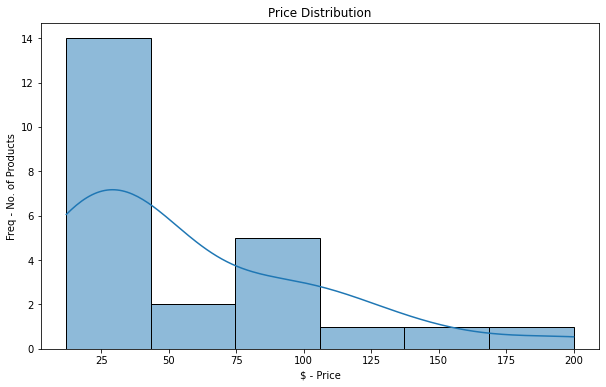

In [161]:
#extra - representation of use case of scraping further for different analysis by data scientists

import matplotlib.pyplot as plt
import seaborn as sns

# Converting price to float value
df['Price'] = df['Price'].replace('[\$,]', '', regex=True).astype(float)

# Visualization
plt.figure(figsize=(10, 6))
sns.histplot(df['Price'], kde=True)
plt.title('Price Distribution')
plt.xlabel('$ - Price')
plt.ylabel('Freq - No. of Products')
plt.show()